In [1]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
# import OS module
import os

In [2]:
path = "http://localhost:8888/tree/Documents/GitHub/Gas_Sensor_Calibration/Mobile data"

obj = os.scandir()
 
# List all files and directories in the specified path
print("Files and Directories in '% s':" % path)
for entry in obj:
    if entry.is_dir() or entry.is_file():
        print(entry.name)

Files and Directories in 'http://localhost:8888/tree/Documents/GitHub/Gas_Sensor_Calibration/Mobile data':
Gases_6nov.csv
GPS_Aero&AQ24_6nov.csv
aeroqual_061121.csv
Untitled.ipynb
GPS_Aero&AQ50_6nov.csv
GPS_Aero&gases_6nov.csv
Aero_AQ24_6nov.csv
6nov_route.csv
20211106-144034.gpx
Aero_AQ50_6nov.csv
Aero_gases_6nov.csv
AQ50_6nov.csv
AQ24_6nov.csv
.ipynb_checkpoints


In [3]:
a = pd.read_csv('Aero_AQ50_6nov.csv', parse_dates = ['created_at'])
b = pd.read_csv('Aero_AQ24_6nov.csv',  parse_dates = ['created_at'])
c = pd.read_csv('Aero_gases_6nov.csv',  parse_dates = ['created_at'])

In [4]:
print(list(a), len(a))
print(list(b), len(b))
print(list(c), len(c))

['created_at', ' Monitor ID', ' Location ID', ' CO(ppm)', ' PM10(ppm)', ' PM2.5(ppm)', 'pm10', 'pm2.5', 'RH', 'Temperature'] 217
['created_at', ' Monitor ID', ' Location ID', ' CO(ppm)', ' PM10(ppm)', ' PM2.5(ppm)', 'pm10', 'pm2.5', 'RH', 'Temperature'] 217
['created_at', ' Monitor ID', ' Location ID', ' CO(ppm)', ' PM10(ppm)', ' PM2.5(ppm)', 'CO_1', 'SO2_1', 'CO_2', 'SO2_2', 'Temperature', 'RH', 'Pressure'] 164


In [5]:
a[' PM10(ppm)'] = pd.to_numeric(a[' PM10(ppm)'], errors='coerce')
a[' PM2.5(ppm)'] = pd.to_numeric(a[' PM2.5(ppm)'], errors='coerce')
b[' PM10(ppm)'] = pd.to_numeric(b[' PM10(ppm)'], errors='coerce')
b[' PM2.5(ppm)'] = pd.to_numeric(b[' PM2.5(ppm)'], errors='coerce')
c[' CO(ppm)'] = pd.to_numeric(c[' CO(ppm)'], errors='coerce')


In [7]:
a = a.dropna(subset=[' PM10(ppm)', ' PM2.5(ppm)'])
b = b.dropna(subset=[' PM10(ppm)', ' PM2.5(ppm)'])
c = c.dropna(subset=[' CO(ppm)'])
#s = c.dropna(subset=[' SO2(ppm)'])

print(len(a))
print(len(b))
print(len(c))
#print(len(s))

79
78
134


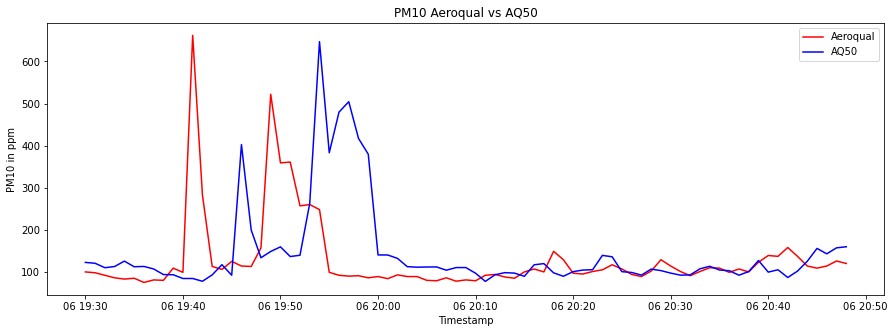

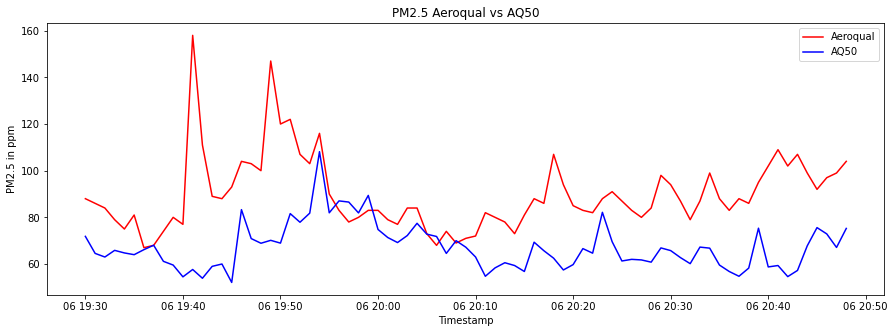

In [8]:
x = a['created_at']
y1 = a[' PM10(ppm)']*1000
y2 = a['pm10']
y3 = a[' PM2.5(ppm)']*1000
y4 = a['pm2.5']

plt.figure(figsize = (15, 5))
plt.plot(x,y1, 'r', label = 'Aeroqual')
plt.plot(x,y2, 'b', label= 'AQ50')
plt.xlabel('Timestamp')
plt.ylabel('PM10 in ppm')
plt.title('PM10 Aeroqual vs AQ50')
plt.legend()
plt.show()
plt.figure(figsize = (15, 5))
plt.plot(x,y3, 'r', label = 'Aeroqual')
plt.plot(x,y4, 'b', label= 'AQ50')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 in ppm')
plt.title('PM2.5 Aeroqual vs AQ50')
plt.legend()
plt.show()


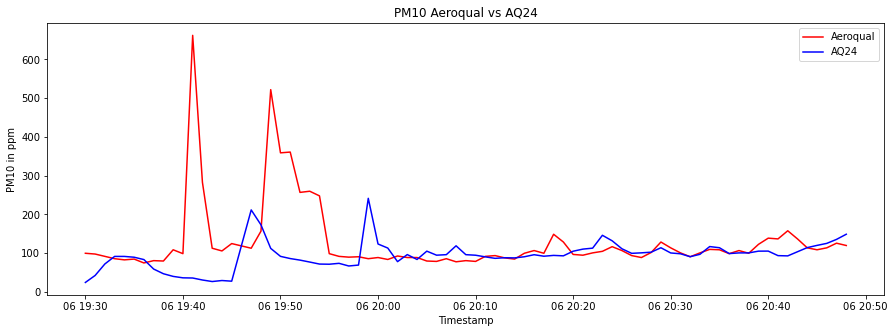

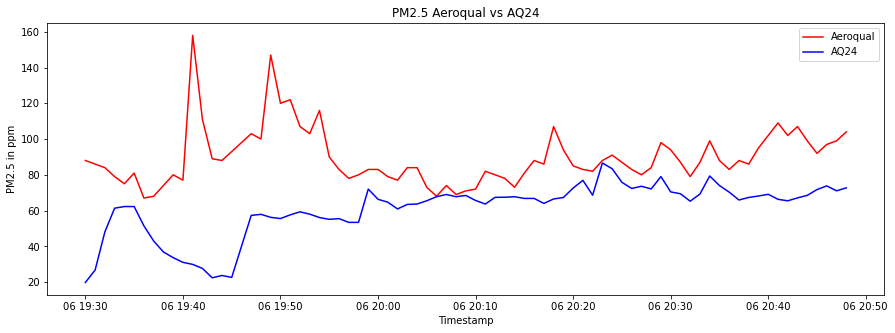

In [9]:
x = b['created_at']
y1 = b[' PM10(ppm)']*1000
y2 = b['pm10']
y3 = b[' PM2.5(ppm)']*1000
y4 = b['pm2.5']

plt.figure(figsize = (15, 5))
plt.plot(x,y1, 'r', label = 'Aeroqual')
plt.plot(x,y2, 'b', label= 'AQ24')
plt.xlabel('Timestamp')
plt.ylabel('PM10 in ppm')
plt.title('PM10 Aeroqual vs AQ24')
plt.legend()
plt.show()
plt.figure(figsize = (15, 5))
plt.plot(x,y3, 'r', label = 'Aeroqual')
plt.plot(x,y4, 'b', label= 'AQ24')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 in ppm')
plt.title('PM2.5 Aeroqual vs AQ24')
plt.legend()
plt.show()


"plt.plot(x,y2, 'b', label= 'AQ24')\nplt.xlabel('Timestamp')\nplt.ylabel('PM10 in ppm')\nplt.title('PM10 Aeroqual vs AQ24')\nplt.legend()\nplt.show()\nplt.figure(figsize = (15, 5))\nplt.plot(x,y3, 'r', label = 'Aeroqual')\nplt.plot(x,y4, 'b', label= 'AQ24')\nplt.xlabel('Timestamp')\nplt.ylabel('PM2.5 in ppm')\nplt.title('PM2.5 Aeroqual vs AQ24')\nplt.legend()\nplt.show()"

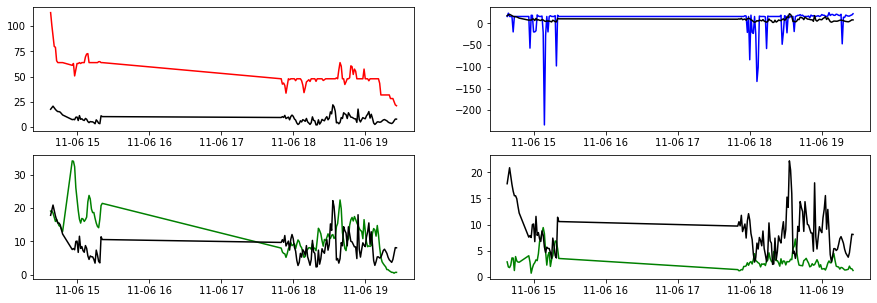

In [12]:
x = c['created_at']
y1 = c['CO_1']
y2 = c['SO2_1']
y3 = c['CO_2']
y4 = c['SO2_2']
y5 = c[' CO(ppm)']
fig, axs = plt.subplots(2,2,figsize = (15, 5))
axs[0,0].plot(x,y1, 'r', label = 'CO_1')
axs[0,0].plot(x,y5, 'k', label = 'Aeroqual')
axs[0,1].plot(x,y2, 'b', label = 'SO2_1')
axs[0,1].plot(x,y5, 'k', label = 'Aeroqual')
axs[1,0].plot(x,y3, 'g', label = 'CO_2')
axs[1,0].plot(x,y5, 'k', label = 'Aeroqual')
axs[1,1].plot(x,y4, 'g', label = 'SO2_2')
axs[1,1].plot(x,y5, 'k', label = 'Aeroqual')
'''plt.plot(x,y2, 'b', label= 'AQ24')
plt.xlabel('Timestamp')
plt.ylabel('PM10 in ppm')
plt.title('PM10 Aeroqual vs AQ24')
plt.legend()
plt.show()
plt.figure(figsize = (15, 5))
plt.plot(x,y3, 'r', label = 'Aeroqual')
plt.plot(x,y4, 'b', label= 'AQ24')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 in ppm')
plt.title('PM2.5 Aeroqual vs AQ24')
plt.legend()
plt.show()'''
